## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import tensorflow.keras as keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
model_ckpt1 = ModelCheckpoint(filepath="./data/tmp1.h5", 
                              monitor="val_loss", 
                              save_best_only=True)
model_ckpt2 = ModelCheckpoint(filepath="./data/tmp2.h5", 
                              monitor="val_loss", 
                              save_best_only=False)
model_ckpt3 = ModelCheckpoint(filepath="./data/tmp3.h5", 
                              monitor="val_loss",
                              save_best_only=True,
                              save_weights_only=True)
Chkpts = [model_ckpt1, model_ckpt2, model_ckpt3]

In [7]:
results = {}

for i, chkpt in enumerate(Chkpts):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Numbers of ModelCheckPoint: %i" % i)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[chkpt]
             )

    # Collect results
    exp_name_tag = ("ModelCheckPoint-%s" % str(i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of ModelCheckPoint: 0
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v2 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v2_2 (Ba (N

50000/50000 [==============================] - 8s 155us/sample - loss: 0.5822 - accuracy: 0.8258 - val_loss: 1.6062 - val_accuracy: 0.4950
Epoch 46/50
50000/50000 [==============================] - 8s 151us/sample - loss: 0.5614 - accuracy: 0.8338 - val_loss: 1.6251 - val_accuracy: 0.4894
Epoch 47/50
50000/50000 [==============================] - 8s 155us/sample - loss: 0.5481 - accuracy: 0.8387 - val_loss: 1.6270 - val_accuracy: 0.4924
Epoch 48/50
50000/50000 [==============================] - 8s 167us/sample - loss: 0.5308 - accuracy: 0.8455 - val_loss: 1.6636 - val_accuracy: 0.4921
Epoch 49/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.5124 - accuracy: 0.8546 - val_loss: 1.6425 - val_accuracy: 0.4933
Epoch 50/50
50000/50000 [==============================] - 7s 147us/sample - loss: 0.4954 - accuracy: 0.8598 - val_loss: 1.6710 - val_accuracy: 0.4886
Numbers of ModelCheckPoint: 1
Model: "model"
_____________________________________________________________

50000/50000 [==============================] - 9s 182us/sample - loss: 0.6749 - accuracy: 0.7883 - val_loss: 1.5659 - val_accuracy: 0.4888
Epoch 40/50
50000/50000 [==============================] - 10s 194us/sample - loss: 0.6572 - accuracy: 0.7978 - val_loss: 1.5739 - val_accuracy: 0.4879
Epoch 41/50
50000/50000 [==============================] - 9s 184us/sample - loss: 0.6389 - accuracy: 0.8047 - val_loss: 1.5660 - val_accuracy: 0.4942
Epoch 42/50
50000/50000 [==============================] - 9s 170us/sample - loss: 0.6221 - accuracy: 0.8114 - val_loss: 1.5682 - val_accuracy: 0.4942
Epoch 43/50
50000/50000 [==============================] - 9s 190us/sample - loss: 0.6043 - accuracy: 0.8178 - val_loss: 1.5950 - val_accuracy: 0.4952
Epoch 44/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.5867 - accuracy: 0.8262 - val_loss: 1.5998 - val_accuracy: 0.4919
Epoch 45/50
50000/50000 [==============================] - 9s 183us/sample - loss: 0.5710 - accuracy: 0.8

50000/50000 [==============================] - 5s 109us/sample - loss: 0.8203 - accuracy: 0.7313 - val_loss: 1.4823 - val_accuracy: 0.4987
Epoch 34/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7998 - accuracy: 0.7409 - val_loss: 1.5136 - val_accuracy: 0.4943
Epoch 35/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7797 - accuracy: 0.7474 - val_loss: 1.5225 - val_accuracy: 0.4918
Epoch 36/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7602 - accuracy: 0.7562 - val_loss: 1.5334 - val_accuracy: 0.4942
Epoch 37/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7435 - accuracy: 0.7627 - val_loss: 1.5194 - val_accuracy: 0.4988
Epoch 38/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7226 - accuracy: 0.7712 - val_loss: 1.5267 - val_accuracy: 0.4998
Epoch 39/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7046 - accuracy: 0.77

In [8]:
# Load back
model = keras.models.load_model("./data/tmp1.h5")
loss_loadback1, acc_loadback1 = model.evaluate(x_test, y_test)

model = keras.models.load_model("./data/tmp2.h5")
loss_loadback2, acc_loadback2 = model.evaluate(x_test, y_test)

model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.load_weights("./data/tmp3.h5")
loss_loadback3, acc_loadback3 = model.evaluate(x_test, y_test)

loss_loadbacks = [loss_loadback1, loss_loadback2, loss_loadback3]
acc_loadbacks = [acc_loadback1, acc_loadback2, acc_loadback3]

10000/10000 [==============================] - 1s 86us/sample - loss: 1.4533 - accuracy: 0.4926


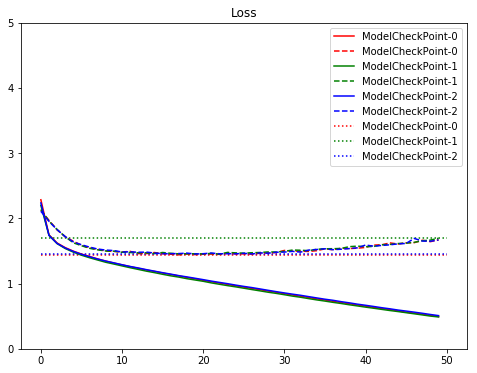

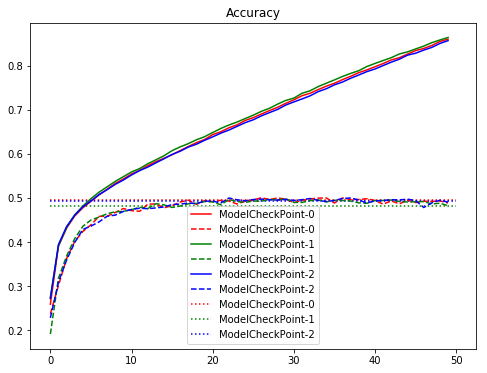

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k", "grey", "brown", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=loss_loadbacks[i], xmin=0, xmax=len(results[cond]['train-loss']), label=cond, colors=color_bar[i], linestyles=':')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=acc_loadbacks[i], xmin=0, xmax=len(results[cond]['train-acc']), label=cond, colors=color_bar[i], linestyles=':')
plt.title("Accuracy")
plt.legend()
plt.show()